In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.callbacks import *

In [3]:
torch.cuda.is_available()

True

In [4]:
np.random.seed(42)

In [5]:
tfms=[flip_lr(p=0.5),dihedral_affine() ],[]

In [6]:
mixup=0.2

In [7]:
loss_func = LabelSmoothingCrossEntropy()

In [ ]:
# class FocalLoss(nn.Module):
#     def __init__(self, alpha=1., gamma=1.):
#         super().__init__()
#         self.alpha = alpha
#         self.gamma = gamma

#     def forward(self, inputs, targets, **kwargs):
#         CE_loss = nn.CrossEntropyLoss(reduction='none')(inputs, targets)
#         pt = torch.exp(-CE_loss)
#         F_loss = self.alpha * ((1-pt)**self.gamma) * CE_loss
#         return F_loss.mean()
# loss_func = FocalLoss(gamma=2.)

In [8]:
alpha=0.99
mom=0.9
eps=1e-6

In [9]:
opt_func = partial(optim.Adam, betas=(mom,alpha), eps=eps)

In [10]:
src = (ImageList.from_folder(path='train').split_by_rand_pct(0.2).label_from_folder())

In [11]:
data = src.transform(tfms,size=(384)).databunch(bs=64).normalize()

In [12]:
learn = cnn_learner(data, models.densenet121,pretrained=False, metrics=[error_rate, accuracy, FBeta(beta=1,average='macro')],loss_func = loss_func,opt_func=opt_func,wd=1e-2)

/home/ubuntu/anaconda3/envs/snakes_breed/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


In [13]:
learn= learn.mixup(alpha=mixup)

In [14]:
learn.bn_wd=False

In [15]:
learn.true_wd=True

In [16]:
learn.load('exp-7-round-1')

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384),Image (3, 384, 384)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

In [17]:
data_448 = src.transform(tfms,size=(448)).databunch(bs=48).normalize()

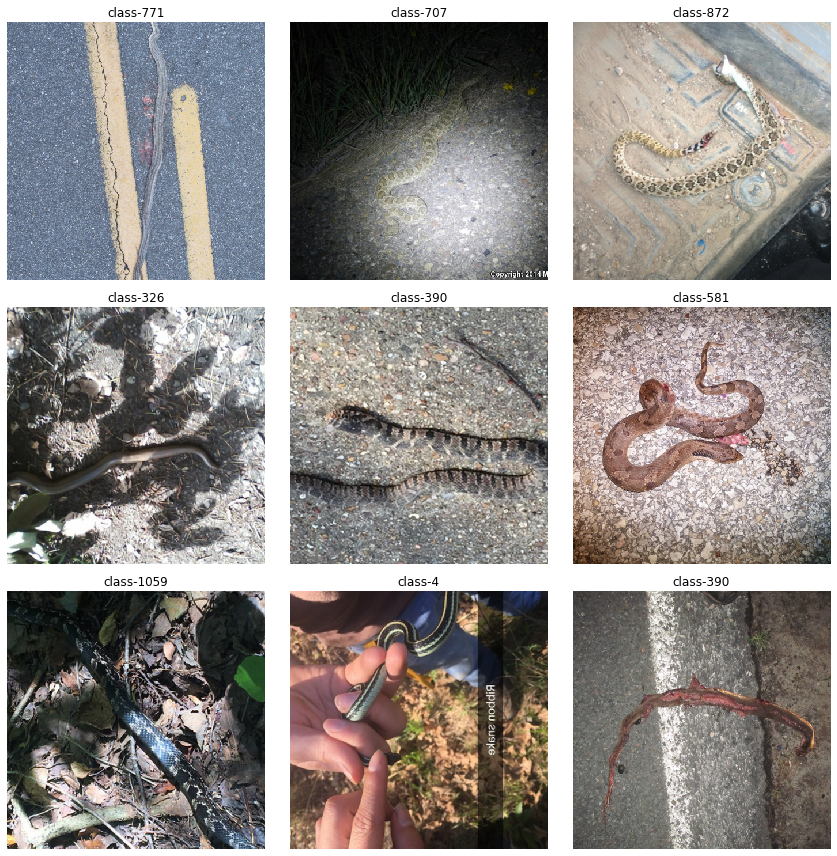

In [18]:
data_448.show_batch(rows=3, figsize=(12,12))


In [19]:
learn.data= data_448

In [20]:
learn.data

ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None

In [21]:
learn = learn.to_fp16(dynamic=True)

In [22]:
learn.unfreeze()

In [23]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


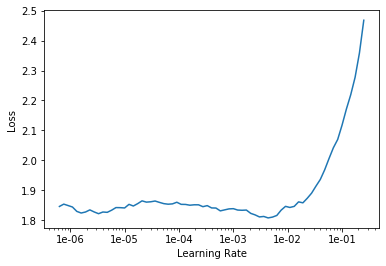

In [24]:
learn.recorder.plot()

In [25]:
lr=5e-4

In [ ]:
learn.fit_one_cycle(20, lr, div_factor=10, pct_start=0.3)

epoch,train_loss,valid_loss,error_rate,accuracy,f_beta,time
0,1.790317,1.475531,0.265364,0.734636,0.685858,15:14
1,1.775754,1.465680,0.262816,0.737184,0.689954,15:12
2,1.787771,1.465224,0.264212,0.735788,0.687642,15:11
3,1.765485,1.455291,0.260268,0.739732,0.690665,15:11
4,1.771097,1.466781,0.263605,0.736395,0.688401,15:12
5,1.771029,1.454482,0.260390,0.739610,0.691318,15:11
6,1.751806,1.457424,0.261664,0.738336,0.694348,15:10
7,1.720334,1.446662,0.256385,0.743615,0.699066,15:10
8,1.734811,1.439212,0.250076,0.749924,0.704576,15:12
9,1.707607,1.432495,0.248680,0.751320,0.710592,15:12


In [44]:
learn.save('exp-8-round-1')

In [28]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (65934 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
class-857,class-857,class-857,class-857,class-857
Path: train;

Valid: LabelList (16483 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
class-540,class-526,class-771,class-4,class-804
Path: train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu0): ReLU(inplace)
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): _DenseBlock(
        (denselayer1): _DenseLayer(
          (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track